### Математическое моделирование
### Лабораторная №2
### Генерация систем непрерывных и дискретных случайных величин

## Задание A

Написать программу реализующую метод формирования двумерной НСВ с определенным распределением (согласно варианту). Выполнить статистическое исследование (построение гистограммы составляющих вектора, вычислить точечные и интервальные оценки, коэффициент корреляции и другое). Проверить гипотезы о соответствии полученных оценок характеристик (математическое ожидание, дисперсия, корреляция) случайной величины теоретическим.

$$ f(x, y) = \frac{12}{7} (x^2 + \frac{y}{2}) $$<br>

Покомпонентные плотности распределения:
$$ f(x)=\frac{12}{7}(x^2 + \frac{1}{4}) $$
<br>
$$ f(y)=\frac{12}{7}(\frac{1}{3} + \frac{y}{2}) $$
<br>

Совместные плотности распределения:
$$ f(x|y)=\frac{f(x,y)}{f(y)}=\frac{2x^2 + y}{\frac{2}{3} + y} $$
<br>
$$ f(y|x)=\frac{f(x,y)}{f(x)}=\frac{2x^2 + y}{2x^2 + \frac{1}{2}} $$

Покомпонентные функции распределения:
$$ F(x)=\int_{0}^{x}\frac{12}{7}(t^2 + \frac{1}{4})dt=\frac{12}{7}(\frac{x^3}{3} + \frac{x}{4}) $$
<br>
$$ F(y)=\int_{0}^{y}\frac{12}{7}(\frac{1}{3} + \frac{t}{2})dt=\frac{12}{7}(\frac{y}{3} + \frac{y^2}{4}) $$


$$ F(x|y)=\int_{0}^{x}\frac{2t^2 + y}{\frac{2}{3} + y}dt=\frac{2x^3 + 3xy}{2 + 3y} $$

Разложим функцию распределения:
$$F(x,y)=F(x|y)F(y)=\frac{(4y + 3y^2)(2x^3 + 3xy)}{7(2 + 3y)} $$

Промоделируем отдельно $F(y)$ и $F(x|y)$:
  
$$\begin{cases}
 \xi_1=\frac{12}{7}(\frac{y}{3} + \frac{y^2}{4}) \\
 \xi_2=\frac{2x^3 + 3xy}{2 + 3y}
\end{cases}$$


$$\begin{cases}
  y=\frac{-2 \pm \sqrt{4 + 21\xi_1}}{3} \\
  x=\frac{\sqrt[3]{2}(\sqrt[3]{2}y - \sqrt[3]{a^2})}{2\sqrt[3]{a}}
\end{cases}, a= -3\xi_2y - 2\xi_2 + \sqrt{\xi_2^2(3y + 2)^2 + 2y^3}$$

In [29]:
# Imports
from sympy import symbols, integrate
import sympy
import numpy as np
import math
import scipy.stats as sts
import pandas as pd

In [151]:
x, y = symbols("x y")
f_xy = 12/7 * (x**2 + y/2)

def f_xy_double():
    return integrate(f_xy, (x, 0, 1), (y, 0, 1))
 
def f_x():
    return integrate(f_xy, (y, 0, 1))

def f_y():
    return integrate(f_xy, (x, 0, 1))

def f__x__y():
    return f_xy / f_y()

def f__y__x():
    return f_xy / f_x()

def F_x():
    return integrate(f_x(), (x, 0, x))

def F_y():
    return integrate(f_y(), (y, 0, y))

def F__x__y():
    return integrate(f__x__y(), (x, 0, x))

def F__y__x():
    return integrate(f__y__x(), (y, 0, y))

##### Проверим необходимое условие для f(x, y)

In [31]:
if f_xy_double() != 1: raise("Необходимое условие не выполняется")

#### Покомпонентные плотности распределения:

In [32]:
f_x(), f_y()

(1.71428571428571*x**2 + 0.428571428571429,
 0.857142857142857*y + 0.571428571428571)

#### Совместные плотности распределения:

In [33]:
print("f(x|y):")
sympy.pprint(f__x__y())
print("\n")
print("f(y|x):")
sympy.pprint(f__y__x())

f(x|y):
                  2                      
1.71428571428571⋅x  + 0.857142857142857⋅y
─────────────────────────────────────────
 0.857142857142857⋅y + 0.571428571428571 


f(y|x):
                  2                      
1.71428571428571⋅x  + 0.857142857142857⋅y
─────────────────────────────────────────
                   2                     
 1.71428571428571⋅x  + 0.428571428571429 


#### Покомпонентные функции распределения:

In [152]:
print("F(x):")
sympy.pprint(F_x())
print("\n")
print("F(y):")
sympy.pprint(F_y())
print("\n")
print("F(x|y):")
sympy.pprint(F__x__y())
print("\n")
print("F(y|x):")
sympy.pprint(F__y__x())

F(x):
                   3                      
0.571428571428571⋅x  + 0.428571428571429⋅x


F(y):
                   2                      
0.428571428571429⋅y  + 0.571428571428571⋅y


F(x|y):
                           3                                                  
         1.71428571428571⋅x                      0.857142857142857⋅x⋅y        
───────────────────────────────────── + ──────────────────────────────────────
2.57142857142857⋅y + 1.71428571428571   0.857142857142857⋅y + 0.57142857142857

 
 
─
1


F(y|x):
                           2                                           2      
         1.71428571428571⋅x ⋅y                      0.857142857142857⋅y       
─────────────────────────────────────── + ────────────────────────────────────
                  2                                         2                 
1.71428571428571⋅x  + 0.428571428571429   3.42857142857143⋅x  + 0.857142857142

   
   
───
   
857


In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl
plt.figure(figsize=(16,12));

from statlib.genarator import Generator

plt.style.use('seaborn')

Найдем обратную функцию для F(y)

In [36]:
x, y, e1, e2 = symbols("x y e1 e2")
sympy.solve(sympy.Eq(3*y**2 + 4*y - 7*e1, 0), y)

[-sqrt(21*e1 + 4)/3 - 2/3, sqrt(21*e1 + 4)/3 - 2/3]

Найдем обратную функцию для F(x|y)

In [37]:
sympy.solve(sympy.Eq(2*x**3 + 3*x*y - (3*y + 2)*e2, 0), x)[0].simplify()

2**(1/3)*(2**(1/3)*y - (-3*e2*y - 2*e2 + sqrt(e2**2*(3*y + 2)**2 + 2*y**3))**(2/3))/(2*(-3*e2*y - 2*e2 + sqrt(e2**2*(3*y + 2)**2 + 2*y**3))**(1/3))

In [38]:
def generate_sample(gen: Generator, n: int):
    return [gen.next() for _ in range(n)]

def get_base_generator(gen):
    def generator(n):
        return generate_sample(gen, n)
    return generator

In [39]:
gen = Generator()
base_genarator = get_base_generator(gen)

In [40]:
rng = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(rng, rng)
Z = 12/7 * (X**2 + Y/2)

In [221]:
def generate_distribution(size, rev=False):
    xi_1 = np.array(base_genarator(size))
    xi_2 = np.array(base_genarator(size))
    yy = np.sqrt(21*xi_1 + 4)/3 - 2/3
    # yy_2 = -np.sqrt(21*xi_1[size//2:] + 4)/3 - 2/3
    # yy = np.concatenate((yy_1, yy_2))
    if rev:
        yy = np.sqrt(21*xi_1 + 4)/3 - 2/3
    a = -3*xi_2*yy - 2*xi_2 + np.sqrt(xi_2**2*(3*yy + 2)**2 + 2*yy**3)
    xx = 2**(1/3)*(2**(1/3)*yy - a**(2/3))/(2*(a)**(1/3))
    return xx, yy

In [222]:
xx, yy = generate_distribution(100000)

In [223]:
(max(yy), min(yy)), (max(xx), min(xx))

((0.9999918218967055, 8.733303829333572e-06),
 (0.9999968163826602, 2.554817355076176e-05))

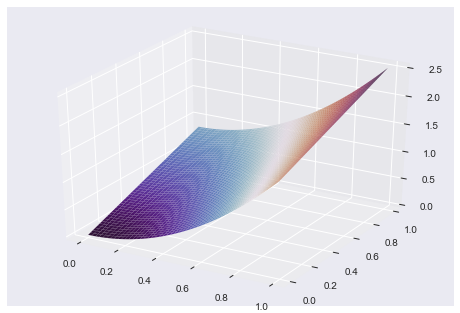

In [224]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='twilight_shifted');

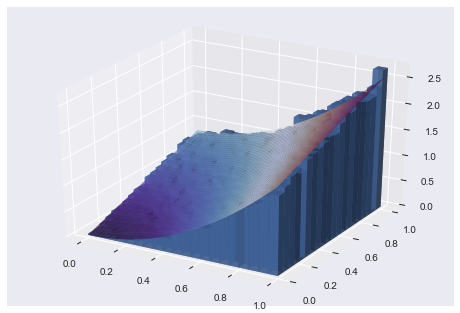

In [225]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
bins = 20
hist, xedges, yedges = np.histogram2d(xx, yy, bins=bins, range=[[0, 1], [0, 1]], density=True)

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 1/bins * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, alpha=0.7)
ax.plot_surface(X, Y, Z, cmap='twilight_shifted', alpha=0.7)

plt.show()

In [179]:
print("Hist sum: %f" % (1/bins**2 * np.sum(hist)))

Hist sum: 1.000000


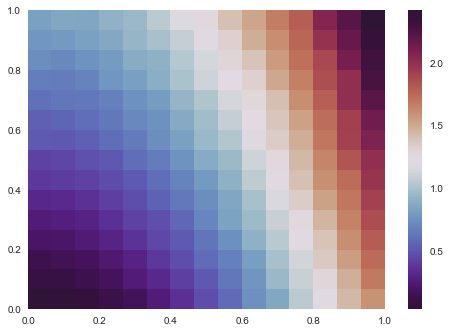

In [180]:
fig, ax = plt.subplots()
h = ax.hist2d(xx, yy, bins=(15, 15), range=[(0, 1), (0, 1)], density=True, cmap='twilight_shifted');
plt.colorbar(h[3], ax=ax);

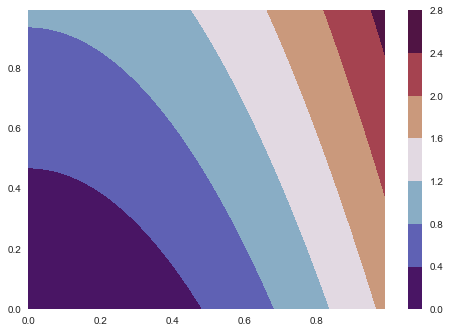

In [122]:
fig = plt.figure()
ax1 = plt.contourf(X, Y, Z, cmap='twilight_shifted')
plt.colorbar(ax1)
plt.show()

### Гистограммы для X

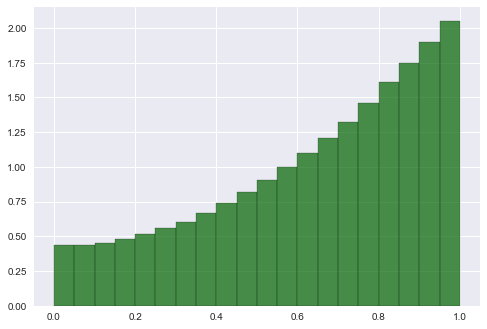

In [181]:
plt.hist(xx, bins=bins, range=(0, 1), density=True, color="darkgreen", edgecolor = 'black', alpha=.7);

### Гистограммы для Y

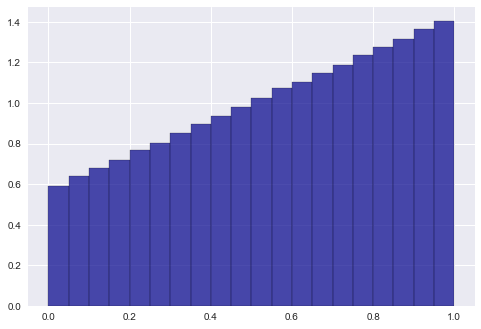

In [182]:
plt.hist(yy, bins=bins, range=(0, 1), density=True, color="darkblue", edgecolor = 'black', alpha=.7);

In [183]:
def get_val_counts(arr):
    counts = {}
    for x in arr:
        counts[x] = counts.get(x, 0) + 1
        
    return counts

def build_distribution_function(x_var):
    counts = get_val_counts(x_var)
    
    F = [0]
    for i in range(len(x_var) - 1):
        F.append(F[i] + counts[x_var[i]] / n)
        
    return F

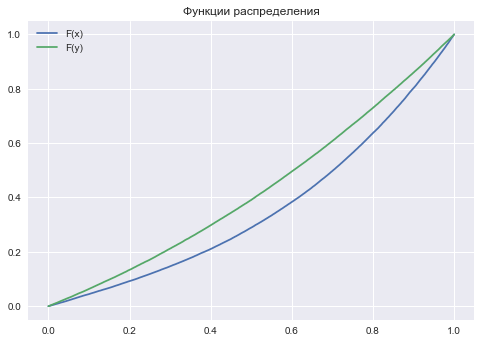

In [200]:
xx_sort = np.array(sorted(xx))
F_x = build_distribution_function(xx_sort)
yy_sort = np.array(sorted(yy))
F_y = build_distribution_function(yy_sort)
plt.step(xx_sort, F_x, label="F(x)");
plt.step(yy_sort, F_y, label="F(y)")
plt.legend(loc="best")
plt.title("Функции распределения");

### Вычисление теоретических оценок
1. Матожидания
2. Дисперсии

In [52]:
def get_math_expect_x():
    return integrate(x*f_xy, (y, 0, 1), (x, 0, 1))

def get_math_expect_y():
    return integrate(y*f_xy, (y, 0, 1), (x, 0, 1))

def get_math_expect_x__y():
    return integrate(x*f__x__y(), (x, 0, 1)).simplify()

def get_math_expect_y__x():
    return integrate(y*f__y__x(), (y, 0, 1)).simplify()

def get_math_expect_xy():
    return get_math_expect_x(), get_math_expect_y()

def get_dispersion_x():
    mx = get_math_expect_x()
    return integrate((x - mx)**2*f_xy, (y, 0, 1), (x, 0, 1))

def get_dispersion_y():
    my = get_math_expect_y()
    return integrate((y - my)**2*f_xy, (y, 0, 1), (x, 0, 1))

def get_dispersion_xy():
    return get_dispersion_x(), get_dispersion_y()

def get_correlation_coeff():
    mx, my = get_math_expect_xy()
    dx, dy = get_dispersion_xy()
    K_xy = integrate(x*y*f_xy, (y, 0, 1), (x, 0, 1)) - mx*my
    r = K_xy / math.sqrt(dx * dy)
    return r

#### Проверка гипотезы независимости: критерий хи-квадрат

In [201]:
def tets_independent_chi2(table):
    p_i = table.sum(axis=1)
    p_j = table.sum(axis=0)
    n = len(p_i)
    m = len(p_j)
    chi2 = 0
    for i in range(n):
        for j in range(m):
            p_ij_t = table[i][j]
            p_ij = p_i[i] * p_j[j]
            # print("Theory: {0} Emperical: {1}".format(p_ij_t, p_ij))
            if p_ij != 0:
                chi2 += (p_ij_t - p_ij)**2 / p_ij
    return chi2*table.size, n, m
    
def show_pearson_criterion(n, exp_chi2, alpha):
    table_chi2 = sts.chi2.ppf(alpha, n - 1)
    print('Experimental chi square: {cs}, Table chi square: {tc}'.format(cs=round(exp_chi2, 5), 
                                                                         tc=round(table_chi2, 5)))
    if exp_chi2 < table_chi2:
        print('Criterion is accepted')
    else:
        print('Criterion is not accepted')

In [202]:
exp_chi2, n, m = tets_independent_chi2(hist)
show_pearson_criterion((n-1)*(m-1), exp_chi2, 0.05)

Experimental chi square: 63680408.11259, Table chi square: 317.02987
Criterion is not accepted


In [55]:
print("Теоретическое условное матожидание:\n")
print("M(x|y):")
get_math_expect_x__y()

Теоретическое условное матожидание:

M(x|y):


1.0*(2.93877551020408*y**2 + 4.89795918367347*y + 1.95918367346939)/(5.87755102040816*y**2 + 7.83673469387755*y + 2.61224489795918)

In [56]:
print("M(y|x):")
get_math_expect_y__x()

M(y|x):


1.0*(8.81632653061224*x**4 + 5.14285714285714*x**2 + 0.73469387755102)/(17.6326530612245*x**4 + 8.81632653061224*x**2 + 1.10204081632653)

### Вычисление точечных оценок
1. Матожидания
2. Дисперсии

In [123]:
xx, yy = generate_distribution(100000, True)

In [124]:
def get_point_math_expectation(sample):
    sample = np.array(sample)
    mx = sum(sample)/len(sample)
    return mx

def get_point_dispersion(sample):
    sample = np.array(sample)
    n = len(sample)
    mx =  get_point_math_expectation(sample)
    dx = sum((sample - mx)**2)/(n - 1)
    return dx

def get_point_correlation(x, y):
    mx, dx = get_point_math_expectation(x), get_point_dispersion(x)
    my, dy = get_point_math_expectation(y), get_point_dispersion(y)
    mxy = np.average(x*y)
    r = (mxy - mx * my) / math.sqrt(dx*dy)
    return r

In [125]:
def show_theor_emp_math_expectation():
    Mt_X, Mt_Y = get_math_expect_xy()
    M_X, M_Y = get_point_math_expectation(xx), get_point_math_expectation(yy)
    print('Theoretical M(X): {0}\nEmpirical M(X): {1}\n'.format(round(Mt_X, 5), round(M_X, 5)))
    print('Theoretical M(Y): {0}\nEmpirical M(Y): {1}\n'.format(round(Mt_Y, 5), round(M_Y, 5)))
    
def show_theor_emp_dispersion():
    D_X, D_Y = get_dispersion_xy()
    Dt_X, Dt_Y = get_point_dispersion(xx), get_point_dispersion(yy)
    print('Theoretical D(X): {0}\nEmpirical D(X): {1}\n'.format(round(Dt_X, 5), round(D_X, 5)))
    print('Theoretical D(Y): {0}\nEmpirical D(Y): {1}\n'.format(round(Dt_Y, 5), round(D_Y, 5))) 

In [126]:
show_theor_emp_math_expectation()
print('-'*30 + '\n')
show_theor_emp_dispersion()

Theoretical M(X): 0.64286
Empirical M(X): 0.64273

Theoretical M(Y): 0.57143
Empirical M(Y): 0.57107

------------------------------

Theoretical D(X): 0.07262
Empirical D(X): 0.07245

Theoretical D(Y): 0.07837
Empirical D(Y): 0.07823



In [127]:
print("Теоретический коэффициент корреляции: {0}".format(round(get_correlation_coeff(), 5)))
print()
print("Эмперический коэффициент корреляции: {0}".format(round(get_point_correlation(xx, yy), 5)))

Теоретический коэффициент корреляции: -0.13554

Эмперический коэффициент корреляции: -0.13639


#### Проверим гипотезы о соответствии полученных оценок характеристик
##### 1. t-тест & z-test
https://ru.wikipedia.org/wiki/T-%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0
https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

In [211]:
def get_t_test_value(sample, is_x=True):
    M = get_point_math_expectation(sample)
    D = get_point_dispersion(sample)
    n = len(sample)
    if is_x:
        m = float(get_math_expect_x())
    else:
        m = float(get_math_expect_y())
    t_test = abs(M - m) / math.sqrt(D/n)
    return t_test

def show_t_test_value(t_test, df):
    p = 1 - sts.t.cdf(t_test, df=df)
    print("Т-статистика = {}".format(t_test))
    print("Вероятность принятия гипотезы = {}".format(2*p))

In [216]:
df = len(yy) - 1
t_test_y = get_t_test_value(yy, is_x=False)
show_t_test_value(t_test_y, df)

Т-статистика = 0.018554823595630123
Вероятность принятия гипотезы = 0.9851962791909838


#### 2. Критерий Фишера (F-test)
https://ru.wikipedia.org/wiki/F-%D1%82%D0%B5%D1%81%D1%82

In [131]:
def get_fisher(sample):
    disp_1 = get_point_dispersion(sample)
    disp_2 = float(get_dispersion_x())
    return min(disp_1, disp_2) / max(disp_1, disp_2)

In [132]:
fisher_x = get_fisher(xx)
fisher_x

0.9976380588884244

In [133]:
alpha = 0.05
n = len(xx) - 1
p_value = sts.f.cdf(fisher_x, n, n-2)
print(p_value)
if p_value > alpha:
    print("Нулевая гипотеза принята")

0.354242065734571
Нулевая гипотеза принята


### Вычисление интервальных оценок
1. Матожидания
2. Дисперсии
3. Дисперсии (Bootstrap)

### 1. Доверительный интервал для матожидания

In [134]:
def get_math_interval(M, D, n, a):
    #Квантиль нормального распределение уровня (1 - a/2)
    stat = sts.norm.ppf(1 - a/2)
    l, r = round(M - math.sqrt(D/(n-1))*stat, 5), round(M + math.sqrt(D/(n-1))*stat, 5)
    return l, r

def math_expectation_interval(x, y, a):
    M_X, M_Y = get_point_math_expectation(x), get_point_math_expectation(y)
    D_X, D_Y = get_point_dispersion(x), get_point_dispersion(y)
    size = len(x)
    l_x, r_x = get_math_interval(M_X, D_X, size, a)
    l_y, r_y = get_math_interval(M_Y, D_Y, size, a)
    return ([l_x, r_x], [l_y, r_y])

def show_math_expectation_interval(sizes, alphas):
    coeff = []
    for n in sizes:
        x, y = generate_distribution(size=n)
        for a in alphas:
            mei_X, mei_Y = math_expectation_interval(x, y, a)
            coeff.append([n, a, str(mei_X), abs(mei_X[0] - mei_X[1]), str(mei_Y), abs(mei_Y[0] - mei_Y[1])])
    return pd.DataFrame(data={
            'size': [x[0] for x in coeff],
            'alpha': [x[1] for x in coeff],
            'M(X)': [x[2] for x in coeff],
            '| M1(X) - M2(X) |': [round(x[3],4) for x in coeff],
            'M(Y)': [x[4] for x in coeff],
            '| M1(Y) - M2(Y) |': [round(x[5],4) for x in coeff]})

Постороим интервальные оценки матожидания для разных уровней доверия

In [136]:
alphas = [0.5, 0.1, 0.01, 0.001]
sizes = [100, 100000]
show_theor_emp_math_expectation()
show_math_expectation_interval(sizes, alphas)

Theoretical M(X): 0.64286
Empirical M(X): 0.64273

Theoretical M(Y): 0.57143
Empirical M(Y): 0.57107



,size,alpha,M(X),| M1(X) - M2(X) |,M(Y),| M1(Y) - M2(Y) |
0,100,0.500,"[0.6034, 0.64154]",0.0381,"[0.55153, 0.589]",0.0375
1,100,0.100,"[0.57597, 0.66897]",0.0930,"[0.52457, 0.61596]",0.0914
2,100,0.010,"[0.54965, 0.69529]",0.1456,"[0.49871, 0.64182]",0.1431
3,100,0.001,"[0.52944, 0.7155]",0.1861,"[0.47885, 0.66167]",0.1828
4,100000,0.500,"[0.64239, 0.64354]",0.0011,"[0.56989, 0.57108]",0.0012
5,100000,0.100,"[0.64156, 0.64437]",0.0028,"[0.56903, 0.57194]",0.0029
6,100000,0.010,"[0.64077, 0.64516]",0.0044,"[0.5682, 0.57277]",0.0046
7,100000,0.001,"[0.64016, 0.64577]",0.0056,"[0.56757, 0.5734]",0.0058


### 2. Доверительный интервал для дисперсии

In [137]:
def get_dispersion_interval(D, n, a):
    stat = sts.norm.ppf(1-a/2)
    l, r = round(D - math.sqrt(D/(n-1))*stat, 5), round(D + math.sqrt(D/(n-1))*stat, 5)
    return l, r

def dispersion_interval(x, y, a):
    D_X, D_Y = get_point_dispersion(x), get_point_dispersion(y)
    size = len(x)
    l_x, r_x = get_dispersion_interval(D_X, size, a)
    l_y, r_y = get_dispersion_interval(D_Y, size, a)
    return ([l_x, r_x], [l_y, r_y])

def show_dispersion_interval(sizes, alphas, stat_func, **kwargs):
    coeff = []
    for n in sizes:
        x, y = generate_distribution(size=n)
        for a in alphas:
            di_X, di_Y = stat_func(x, y, a, **kwargs)
            coeff.append([n, a, str(di_X), abs(di_X[0] - di_X[1]), str(di_Y), abs(di_Y[0] - di_Y[1])])
    return pd.DataFrame(data={
            'size': [x[0] for x in coeff],
            'alpha': [x[1] for x in coeff],
            'D(X)': [x[2] for x in coeff],
            '| D1(X) - D2(X) |': [round(x[3],4) for x in coeff], 
            'D(Y)': [x[4] for x in coeff],
            '| D1(Y) - D2(Y) |': [round(x[5],4) for x in coeff]})

In [142]:
alphas = [0.5, 0.1, 0.01, 0.001]
sizes = [100, 100000]
show_theor_emp_dispersion()
df_disp_int = show_dispersion_interval(sizes, alphas, dispersion_interval)
df_disp_int

Theoretical D(X): 0.07262
Empirical D(X): 0.07245

Theoretical D(Y): 0.07837
Empirical D(Y): 0.07823



,size,alpha,D(X),| D1(X) - D2(X) |,D(Y),| D1(Y) - D2(Y) |
0,100,0.500,"[0.05949, 0.09748]",0.0380,"[0.06903, 0.10954]",0.0405
1,100,0.100,"[0.03217, 0.1248]",0.0926,"[0.03989, 0.13868]",0.0988
2,100,0.010,"[0.00596, 0.15101]",0.1451,"[0.01193, 0.16664]",0.1547
3,100,0.001,"[-0.01416, 0.17113]",0.1853,"[-0.00953, 0.18811]",0.1976
4,100000,0.500,"[0.07161, 0.07276]",0.0012,"[0.07808, 0.07927]",0.0012
5,100000,0.100,"[0.07079, 0.07358]",0.0028,"[0.07722, 0.08013]",0.0029
6,100000,0.010,"[0.07, 0.07438]",0.0044,"[0.07639, 0.08096]",0.0046
7,100000,0.001,"[0.06939, 0.07498]",0.0056,"[0.07576, 0.08159]",0.0058


### 3. Простроим доверительный интервал для дисперсии на основе bootstrap

In [139]:
def get_bootstrap_samples(data, sample_count, sample_size_percent):
    indices = np.random.randint(0, len(data), (sample_count, int(len(data)*sample_size_percent/100)))
    samples = np.array(data)[indices]
    return samples

def get_stat_intervals(stat, alpha):
    bound = np.percentile(stat, [100*alpha/ 2, 100*(1-alpha/2)])
    return round(bound[0], 5), round(bound[1], 5)

def apply_dispersion_bootstrap(sample, sample_count, sample_size_percent):
    if sample_size_percent is None:
        sample_size_percent = 100
    if 0 > sample_size_percent > 100:
        raise ValueError("sample_size_percent should be on interval [0, 1]")
    return list(map(get_point_dispersion, get_bootstrap_samples(sample, sample_count, sample_size_percent)))

def stat_intervals(x, y, alpha, sample_count=100, sample_size_percent=None):
    ilec_x = apply_dispersion_bootstrap(x, sample_count=sample_count, sample_size_percent=sample_size_percent)
    ilec_y = apply_dispersion_bootstrap(y, sample_count=sample_count, sample_size_percent=sample_size_percent)
    return get_stat_intervals(ilec_x, alpha), get_stat_intervals(ilec_x, alpha)

In [143]:
alphas = [0.5, 0.1, 0.01, 0.001]
show_theor_emp_dispersion()
df_disp_boot = show_dispersion_interval(sizes, alphas, stat_intervals, sample_count=100, sample_size_percent=50)
df_disp_boot

Theoretical D(X): 0.07262
Empirical D(X): 0.07245

Theoretical D(Y): 0.07837
Empirical D(Y): 0.07823



,size,alpha,D(X),| D1(X) - D2(X) |,D(Y),| D1(Y) - D2(Y) |
0,100,0.500,"(0.06617, 0.08771)",0.0215,"(0.06617, 0.08771)",0.0215
1,100,0.100,"(0.05331, 0.09489)",0.0416,"(0.05331, 0.09489)",0.0416
2,100,0.010,"(0.05058, 0.10713)",0.0566,"(0.05058, 0.10713)",0.0566
3,100,0.001,"(0.03927, 0.11625)",0.0770,"(0.03927, 0.11625)",0.0770
4,100000,0.500,"(0.07221, 0.07274)",0.0005,"(0.07221, 0.07274)",0.0005
5,100000,0.100,"(0.07197, 0.07299)",0.0010,"(0.07197, 0.07299)",0.0010
6,100000,0.010,"(0.07127, 0.07334)",0.0021,"(0.07127, 0.07334)",0.0021
7,100000,0.001,"(0.07164, 0.07348)",0.0018,"(0.07164, 0.07348)",0.0018


In [148]:
pd.concat([df_disp_int, df_disp_boot])

,size,alpha,D(X),| D1(X) - D2(X) |,D(Y),| D1(Y) - D2(Y) |
0,100,0.500,"[0.05949, 0.09748]",0.0380,"[0.06903, 0.10954]",0.0405
1,100,0.100,"[0.03217, 0.1248]",0.0926,"[0.03989, 0.13868]",0.0988
2,100,0.010,"[0.00596, 0.15101]",0.1451,"[0.01193, 0.16664]",0.1547
3,100,0.001,"[-0.01416, 0.17113]",0.1853,"[-0.00953, 0.18811]",0.1976
4,100000,0.500,"[0.07161, 0.07276]",0.0012,"[0.07808, 0.07927]",0.0012
5,100000,0.100,"[0.07079, 0.07358]",0.0028,"[0.07722, 0.08013]",0.0029
6,100000,0.010,"[0.07, 0.07438]",0.0044,"[0.07639, 0.08096]",0.0046
7,100000,0.001,"[0.06939, 0.07498]",0.0056,"[0.07576, 0.08159]",0.0058
0,100,0.500,"(0.06617, 0.08771)",0.0215,"(0.06617, 0.08771)",0.0215
1,100,0.100,"(0.05331, 0.09489)",0.0416,"(0.05331, 0.09489)",0.0416


### Критерий согласия Пирсона

In [74]:
def validate_pearson_conditional(f, arg, p_e, edges):
    chi = 0
    m = len(p_e)
    for i, val in enumerate(edges):
        pi_s = f.subs({arg:val})
        pi = p_e[i] / m
        # print("Theory: {0} Emperical: {1} --- {2}".format(pi_s, pi, (pi_s - pi)**2 / pi))
        chi += (pi_s - pi)**2 / pi
    return chi

In [75]:
def validate_pearson_table(table, x_bins, y_bins):
    chi = 0
    for i, val_i in enumerate(x_bins):
        for j, val_j in enumerate(y_bins):
            pij_t = f_xy.subs({x:val_i,y:val_j})
            pij = table[i][j]
            # print("Theory: {0} Emperical: {1}".format(pij_t, pij))
            if pij != 0:
                chi += (pij_t - pij)**2 / pij
    return chi

In [76]:
exp_chi2 = validate_pearson_table(hist, xedges[:-1], yedges[:-1])
show_pearson_criterion((len(xedges[:-1]))**2, exp_chi2, 0.01)

Experimental chi square: 1.9774, Table chi square: 177.7186
Criterion is accepted


In [77]:
f_x()

1.71428571428571*x**2 + 0.428571428571429

In [78]:
f_y()

0.857142857142857*y + 0.571428571428571

In [79]:
print("Chi square for X:")
exp_chi2 = validate_pearson_conditional(f_x(), x, hist.sum(axis=0), xedges[:-1])
show_pearson_criterion(len(xedges[:-1]), exp_chi2, 0.01)
print()
print("Chi square for Y:")
exp_chi2 = validate_pearson_conditional(f_y(), y, hist.sum(axis=0), yedges[:-1])
show_pearson_criterion(len(yedges[:-1]), exp_chi2, 0.01)
print()

Chi square for X:
Experimental chi square: 0.96622, Table chi square: 4.66043
Criterion is accepted

Chi square for Y:
Experimental chi square: 0.01356, Table chi square: 4.66043
Criterion is accepted



In [80]:
import numpy as np
def temp_gen(n):
    return [np.random.uniform() for _ in range(n)]

In [81]:
def gen_math():
    res = []
    for i in range(1000):
        samp = temp_gen(1000)
        res += [(get_point_math_expectation(samp) - 1/2) / math.sqrt(get_point_dispersion(samp)/(len(samp)-1))]
    return res

def gen_disp():
    res = []
    for i in range(1000):
        samp = temp_gen(5000)
        res += [(get_point_dispersion(samp) - 1/12) / math.sqrt(get_point_dispersion(samp)/(len(samp)-1))]
    return res

CPU times: user 2.75 s, sys: 15.5 ms, total: 2.77 s
Wall time: 2.78 s
CPU times: user 14.3 s, sys: 59.4 ms, total: 14.4 s
Wall time: 14.5 s


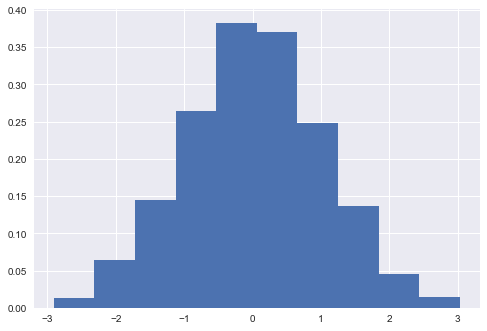

In [82]:
%time res_math = gen_math()
%time res_disp = gen_disp()
plt.hist(res_math, density=True);

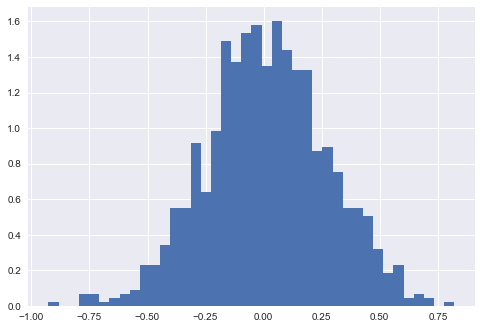

In [83]:
plt.hist(res_disp, bins=40, density=True);